# Black Friday Purchases Data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Read data

In [30]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Which columns can't we use for prediction? 

In [32]:
 df.drop(['User_ID','Product_ID'],axis=1, inplace=True)

#### Fill in Nan's with zero . Also Product categories should be integers not floats.


In [33]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype(int)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype(int)


## EDA

#### Check how many unique values are in each column.

In [34]:
df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

#### Make a countplot for each column apart from Purchase.

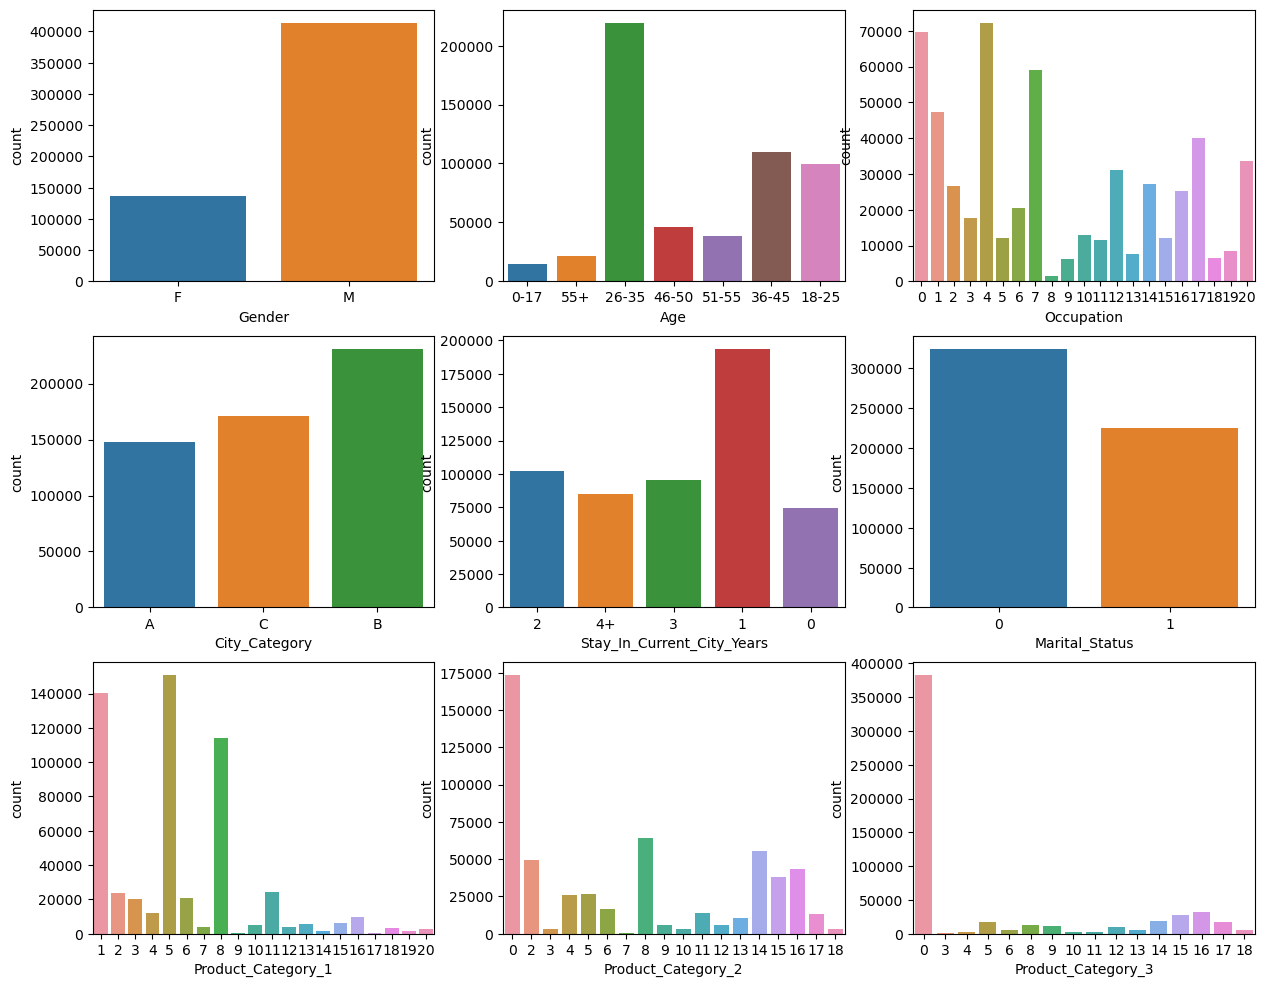

In [35]:
fig,axes = plt.subplots(3,3,figsize=(15,12))
for col,ax in zip(df.columns[:-1],axes.flatten()):
    sns.countplot(data=df,x=col,ax=ax)


#### Make a histogram of Purchase.

Mean purchase:  9263.968712959126
Standard deviation:  5023.065393820627


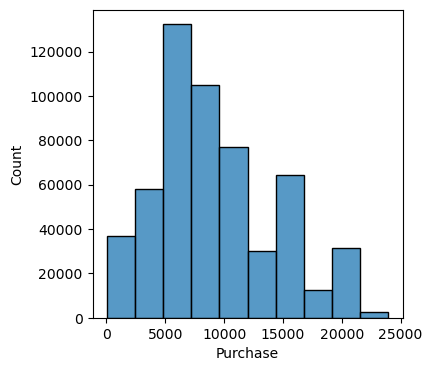

In [36]:
plt.figure(figsize=(4,4))
sns.histplot(data=df,x='Purchase',bins=10)
print('Mean purchase: ',df.Purchase.mean())
print('Standard deviation: ',df.Purchase.std())

#### Make boxplots of Purchase for each value in each column

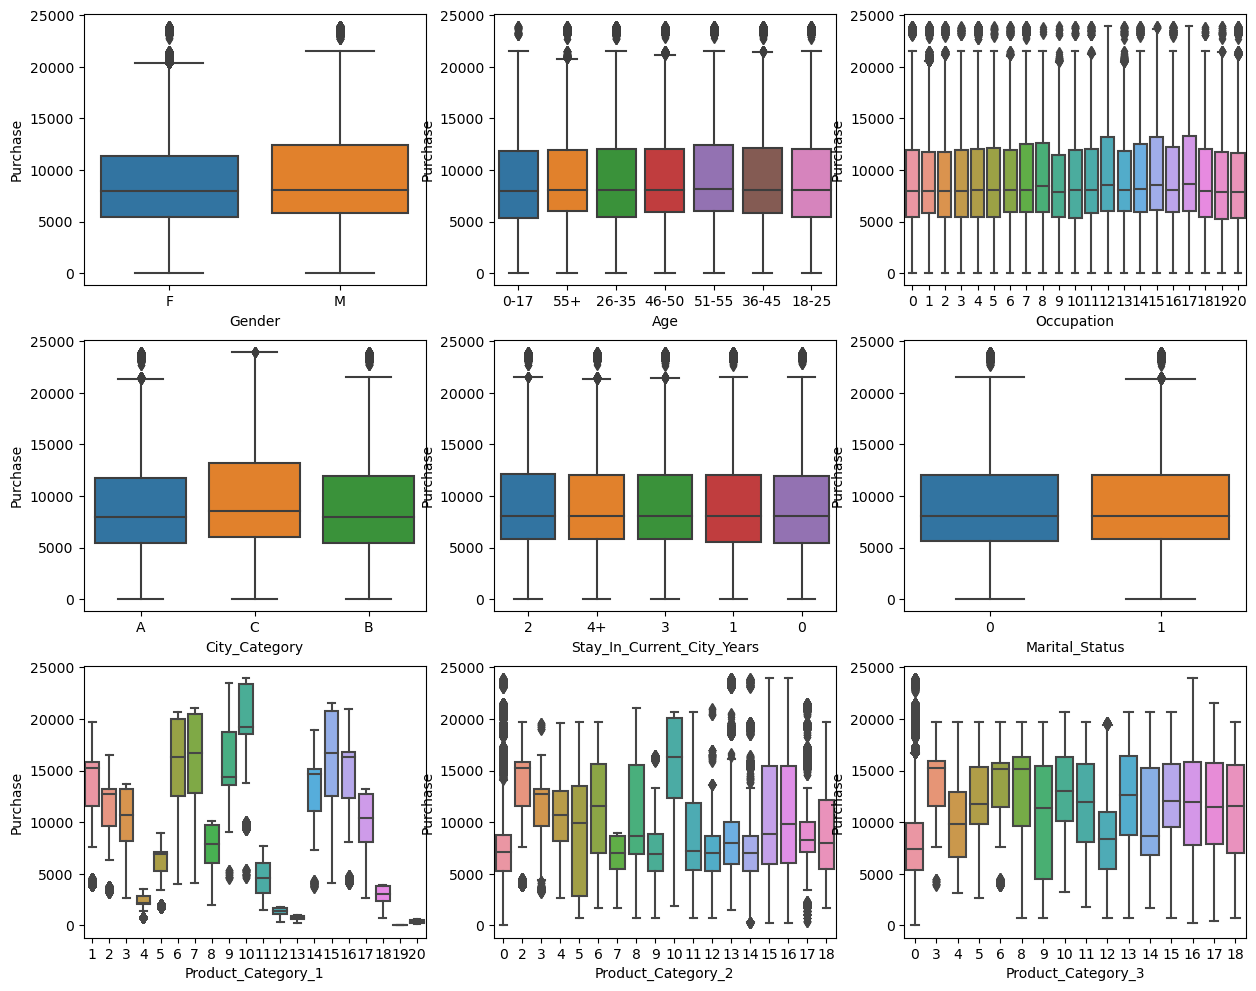

In [37]:
fig,axes = plt.subplots(3,3,figsize=(15,12))
for col,ax in zip(df.columns[:-1],axes.flatten()):
    sns.boxplot(data=df,x=col,y='Purchase',ax=ax)

#### Make categorical variables for "Gender" ,'City Category'


In [38]:
df['Gender']=pd.factorize(df.Gender)[0]
df['City_Category']=pd.factorize(df.City_Category)[0]

#### Encode the age groups


In [39]:
df['Age'] = df['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6}).astype(int)

#### Remove the + from Stay In Current City and make into integers

In [40]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.strip('+').astype(int)

#### Get info about columns again to see if we have missed anything.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int32
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category_1          550068 non-null  int64
 7   Product_Category_2          550068 non-null  int32
 8   Product_Category_3          550068 non-null  int32
 9   Purchase                    550068 non-null  int64
dtypes: int32(4), int64(6)
memory usage: 33.6 MB


#### Make heatmap showing correlations between each pair of columns.

<AxesSubplot:>

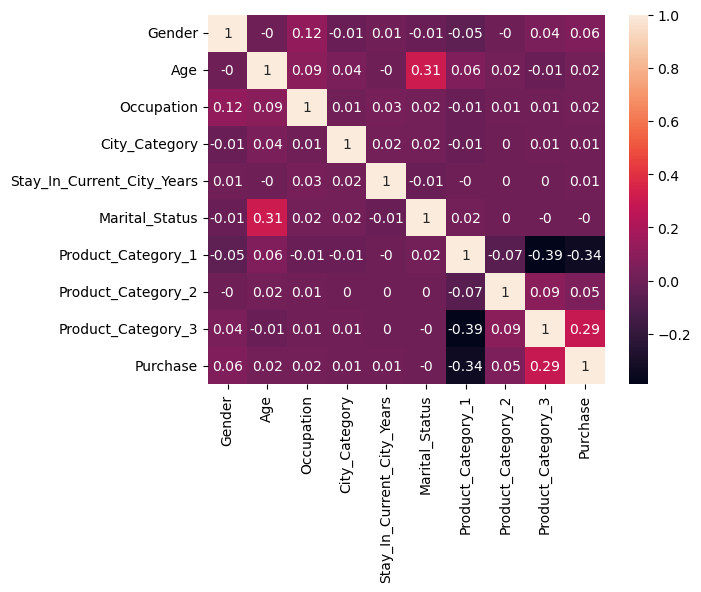

In [42]:
sns.heatmap(df.corr().round(2),annot=True)

#### Make a scatterplot showing Product Category 1 on the x axis, Purchase on the y axis and colour by  Product category 3 

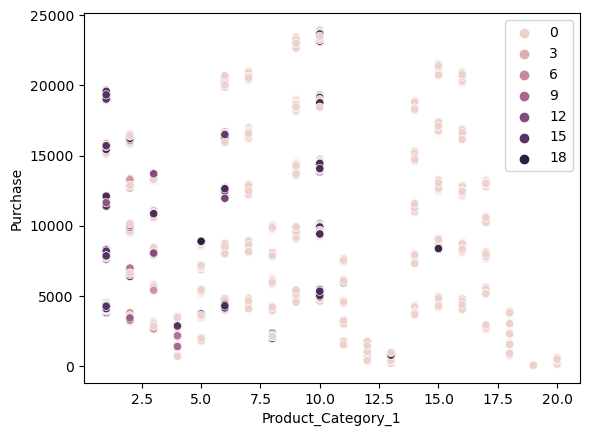

In [43]:
sns.scatterplot(data=df,x='Product_Category_1',y='Purchase',hue='Product_Category_3')
plt.legend(loc='upper right')

## Train , Validate and Test

#### Split into train, validation and test sets. First make test set with 20% of the data and then validation set with 30% of the rest of the data. Random state =1.

In [44]:
from sklearn.model_selection import train_test_split
y = df.Purchase
X = df.drop('Purchase',axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,random_state = 1)
 


#### Try first a decision tree regressor with max_depth = 3, min_samples_leaf =2, random state=1

In [45]:
import sklearn.tree as tree
dtr = tree.DecisionTreeRegressor(criterion = 'squared_error',
                                 max_depth = 3, min_samples_leaf = 2,random_state = 1)
dtr.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=1)

#### Plot the tree

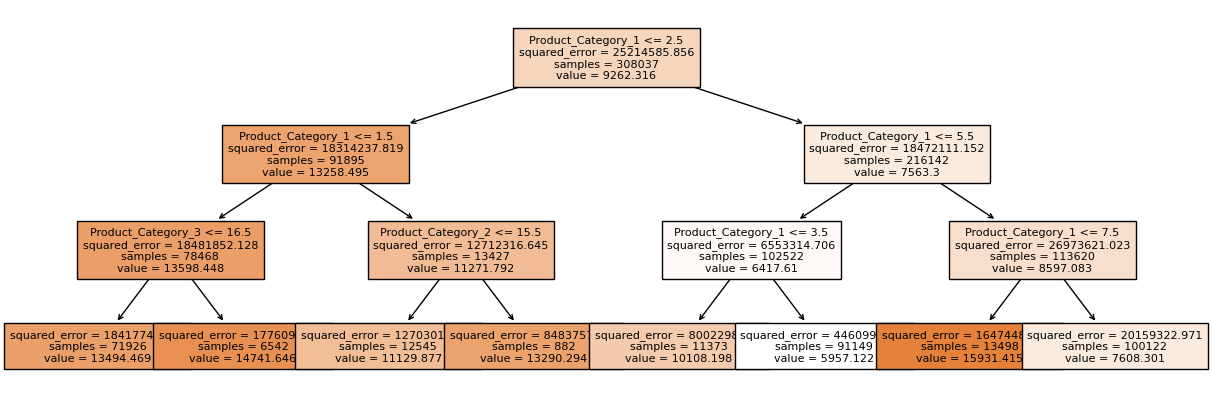

In [46]:
fig, axes = plt.subplots(1,1, figsize=(15,5))
tree.plot_tree(dtr, feature_names = list(x_train.columns), filled = True,fontsize=8)
fig.savefig('imagename.png')

#### Predict on  train set and validation set and compute R^2 and RMSE for both.

In [47]:
val_pred = dtr.predict(x_val)
train_pred = dtr.predict(x_train)
from sklearn.metrics import r2_score,mean_squared_error
print('R^2 for train set: ' + str(r2_score(y_train,train_pred)))
print('RMSE for train set: ' + str(mean_squared_error(y_train,train_pred)**0.5))
print('R^2 for val set: ' + str(r2_score(y_val,val_pred)))
print('RMSE for val set: ' + str(mean_squared_error(y_val,val_pred)**0.5))


R^2 for train set: 0.4404371892271377
RMSE for train set: 3756.2141224875986
R^2 for val set: 0.4411836117716118
RMSE for val set: 3751.9922167027094


#### Run decision tree for max_depth between 3 and 15 and show R^2 and RMSE for train and val sets for each depth.

In [48]:
r2_train = []
r2_val = []
rmse_train= []
rmse_val = []
for i in range( 3,16):
    dtr = tree.DecisionTreeRegressor(max_depth = i,random_state=1)
    dtr.fit(x_train,y_train)
    val_pred = dtr.predict(x_val)
    r2_val.append(r2_score(y_val,val_pred))
    rmse_val.append(mean_squared_error(y_val,val_pred)**0.5)
    train_pred = dtr.predict(x_train)
    r2_train.append(r2_score(y_train,train_pred))
    rmse_train.append(mean_squared_error(y_train,train_pred)**0.5)
pd.DataFrame({'max_depth':range(3,16),'r2_train':r2_train,'r2_val':r2_val,
              'rmse_train':rmse_train,'rmse_val':rmse_val}).set_index('max_depth')

,r2_train,r2_val,rmse_train,rmse_val
max_depth,,,,
3,0.440437,0.441184,3756.214122,3751.992217
4,0.476925,0.474377,3631.682722,3638.851562
5,0.580540,0.578051,3252.154489,3260.300023
6,0.643588,0.643587,2997.797703,2996.428070
7,0.646953,0.646012,2983.612774,2986.219957
8,0.650268,0.648064,2969.569256,2977.552016
9,0.654148,0.650067,2953.050481,2969.063707
10,0.658449,0.650822,2934.633608,2965.860531
11,0.663614,0.650832,2912.357825,2965.817901


#### Which is the best model? Retrain the tree with the optimal value for max_depth.

In [49]:
dtr = tree.DecisionTreeRegressor(max_depth = 11,random_state=1)
dtr.fit(x_train,y_train)
val_pred = dtr.predict(x_val)

#### Make a bar plot of feature importances. 

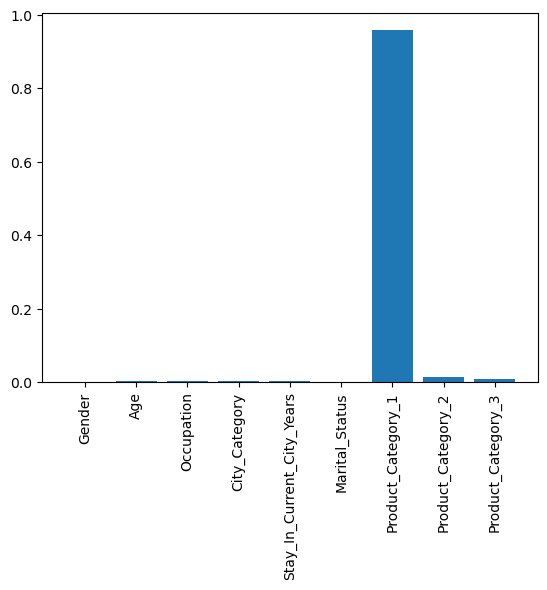

In [50]:
imp = dtr.feature_importances_
plt.bar(x_test.columns,imp)
_=plt.xticks(rotation=90)

#### Drop unimportant columns to speed up training with other algorithms.

In [51]:
X = df[['Product_Category_1','Product_Category_2','Product_Category_3']]

y = df.Purchase

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,random_state = 1)
 
x_train.head()

,Product_Category_1,Product_Category_2,Product_Category_3
541878,1,8,17
375350,1,5,15
269014,8,0,0
293396,14,0,0
20145,5,8,0


#### Next try - Random Forest Regressor. Try out different numbers of estimators and max depth

In [52]:
from sklearn.ensemble import RandomForestRegressor
n = [10,30,50,100]
d = range(8,13)
r2 = []

for i in d:
    for j in n:
        rf = RandomForestRegressor(n_estimators = j,max_depth = i,random_state=1)
        rf.fit(x_train,y_train)
        val_pred = rf.predict(x_val)
        r2.append(r2_score(y_val,val_pred))



#### Make a plot showing the R^2 score for different numbers of estimators and max_depth

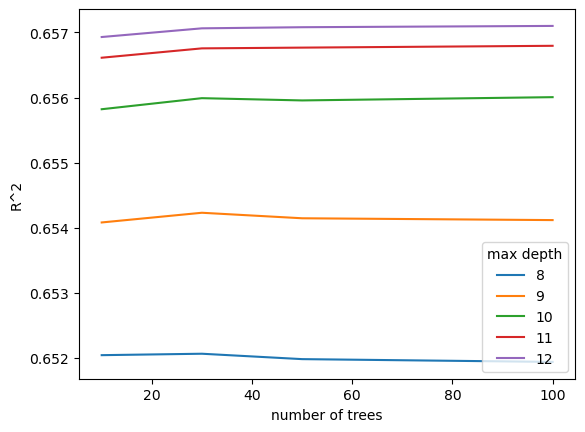

In [53]:
for i in range(5):
    plt.plot(n, r2[4*i:4*i+4],label= i+8)
plt.legend(title = 'max depth',loc='lower right')
plt.xlabel('number of trees')
_=plt.ylabel('R^2')

#### Make a scatter plot with predictions against true values

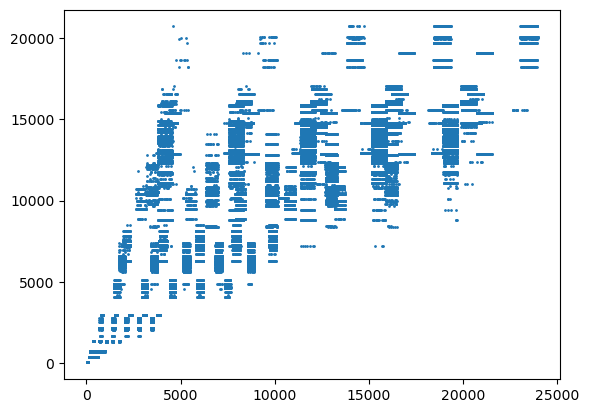

In [54]:
plt.scatter(y_val,val_pred,s=1)

#### Next try: XGBoost

In [55]:
from xgboost import XGBRegressor 
xgb = XGBRegressor(random_state = 1)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_val)
print(r2_score(y_val,y_pred_xgb))
mean_squared_error(y_val,y_pred_xgb)**0.5

ModuleNotFoundError: No module named 'xgboost'

#### Tune the hyperparameters with a Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]
params = {
"learning_rate"    : learning_rate,
"max_depth"        : max_depth,
"min_child_weight" : min_child_weight,
"gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}
xgb_tune = XGBRegressor(random_state = 1)
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, verbose = 0, random_state = 1)
xgb_cv.fit(x_train, y_train)
xgb_cv.best_score_

#### What are the best parameters it found?

In [ ]:
xgb_cv.best_params_

#### Use these parameters to retrain the model and predict on the validation set.

In [ ]:
xgb_best = XGBRegressor(min_child_weight = 53, max_depth = 9,learning_rate = 0.5, gamma = 0.3, 
                        colsample_bytree = 0.5, verbosity = 0, random_state = 1)
xgb_best.fit(x_train, y_train)
y_pred_xgb_best = xgb_best.predict(x_val)
print("RMSE:",mean_squared_error(y_val, y_pred_xgb_best)**0.5)
print("R2 score:", r2_score(y_val, y_pred_xgb_best))

In [ ]:
plt.scatter(y_val,y_pred_xgb_best,s=1)

In [ ]:
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic

kernel =  1*RBF()+1*RationalQuadratic()

#### Last try: Gaussian Process Regressor

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
y_mean = y.mean()
y_new = y- y_mean

#If the training set is too big you will run  out of memory
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95,random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.9,random_state = 1)
 
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=False)
gp.fit(x_train, y_train)

mean_y_pred = gp.predict(x_val)
print(r2_score(y_val,mean_y_pred))
mean_squared_error(y_val,mean_y_pred)**0.5

In [ ]:
plt.scatter(y_val,mean_y_pred,s=1)

#### What parameters were found for the model?

In [ ]:
gp.kernel_

#### And the winner was.... 

#### The random forest model with max_depth = 12 and 30 trees 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,random_state = 1)
 
rf = RandomForestRegressor(n_estimators = 30,max_depth = 12,random_state=1)
rf.fit(x_train,y_train)
test_pred = rf.predict(x_test)
print(r2_score(y_test,test_pred))
mean_squared_error(y_test,test_pred)**0.5



In [ ]:
plt.scatter(y_test,test_pred,s=1)